### Adapted from Coursera Deep Learning Speciality: Neural Networks and Deep Learning

#### offered by deeplearning.ai

In [19]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from shallownn import io
from shallownn import models
from shallownn import predict

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [5]:
np.random.seed(1)

In [6]:
train_h5py = '../datasets/train_catvnoncat.h5'
test_h5py = '../datasets/test_catvnoncat.h5'
train_x_orig, train_y, test_x_orig, test_y, classes = io.load_data(train_h5py,test_h5py)

y = 0. It's a non-cat picture.


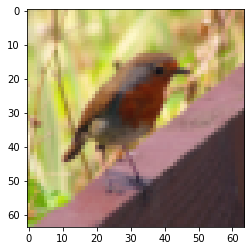

In [7]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [8]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [9]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

In [25]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate=0.0075
iterations=

Cost after iteration 0: 0.6930497356599888
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354664
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.4007977536203889
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.3052753636196265
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.24681768210614838
Cost after iteration 1400: 0.19850735037466116
Cost after iteration 1500: 0.17448318112556654
Cost after iteration 1600: 0.17080762978095898
Cost after iteration 1700: 0.11306524562164738
Cost after iteration 1800: 0.09629426845937153
Cost after iteration 1900: 0.08342617959726858
Cost after iteration 2000: 0.0743907870431908
Cost after iteration 2100: 0.066307481

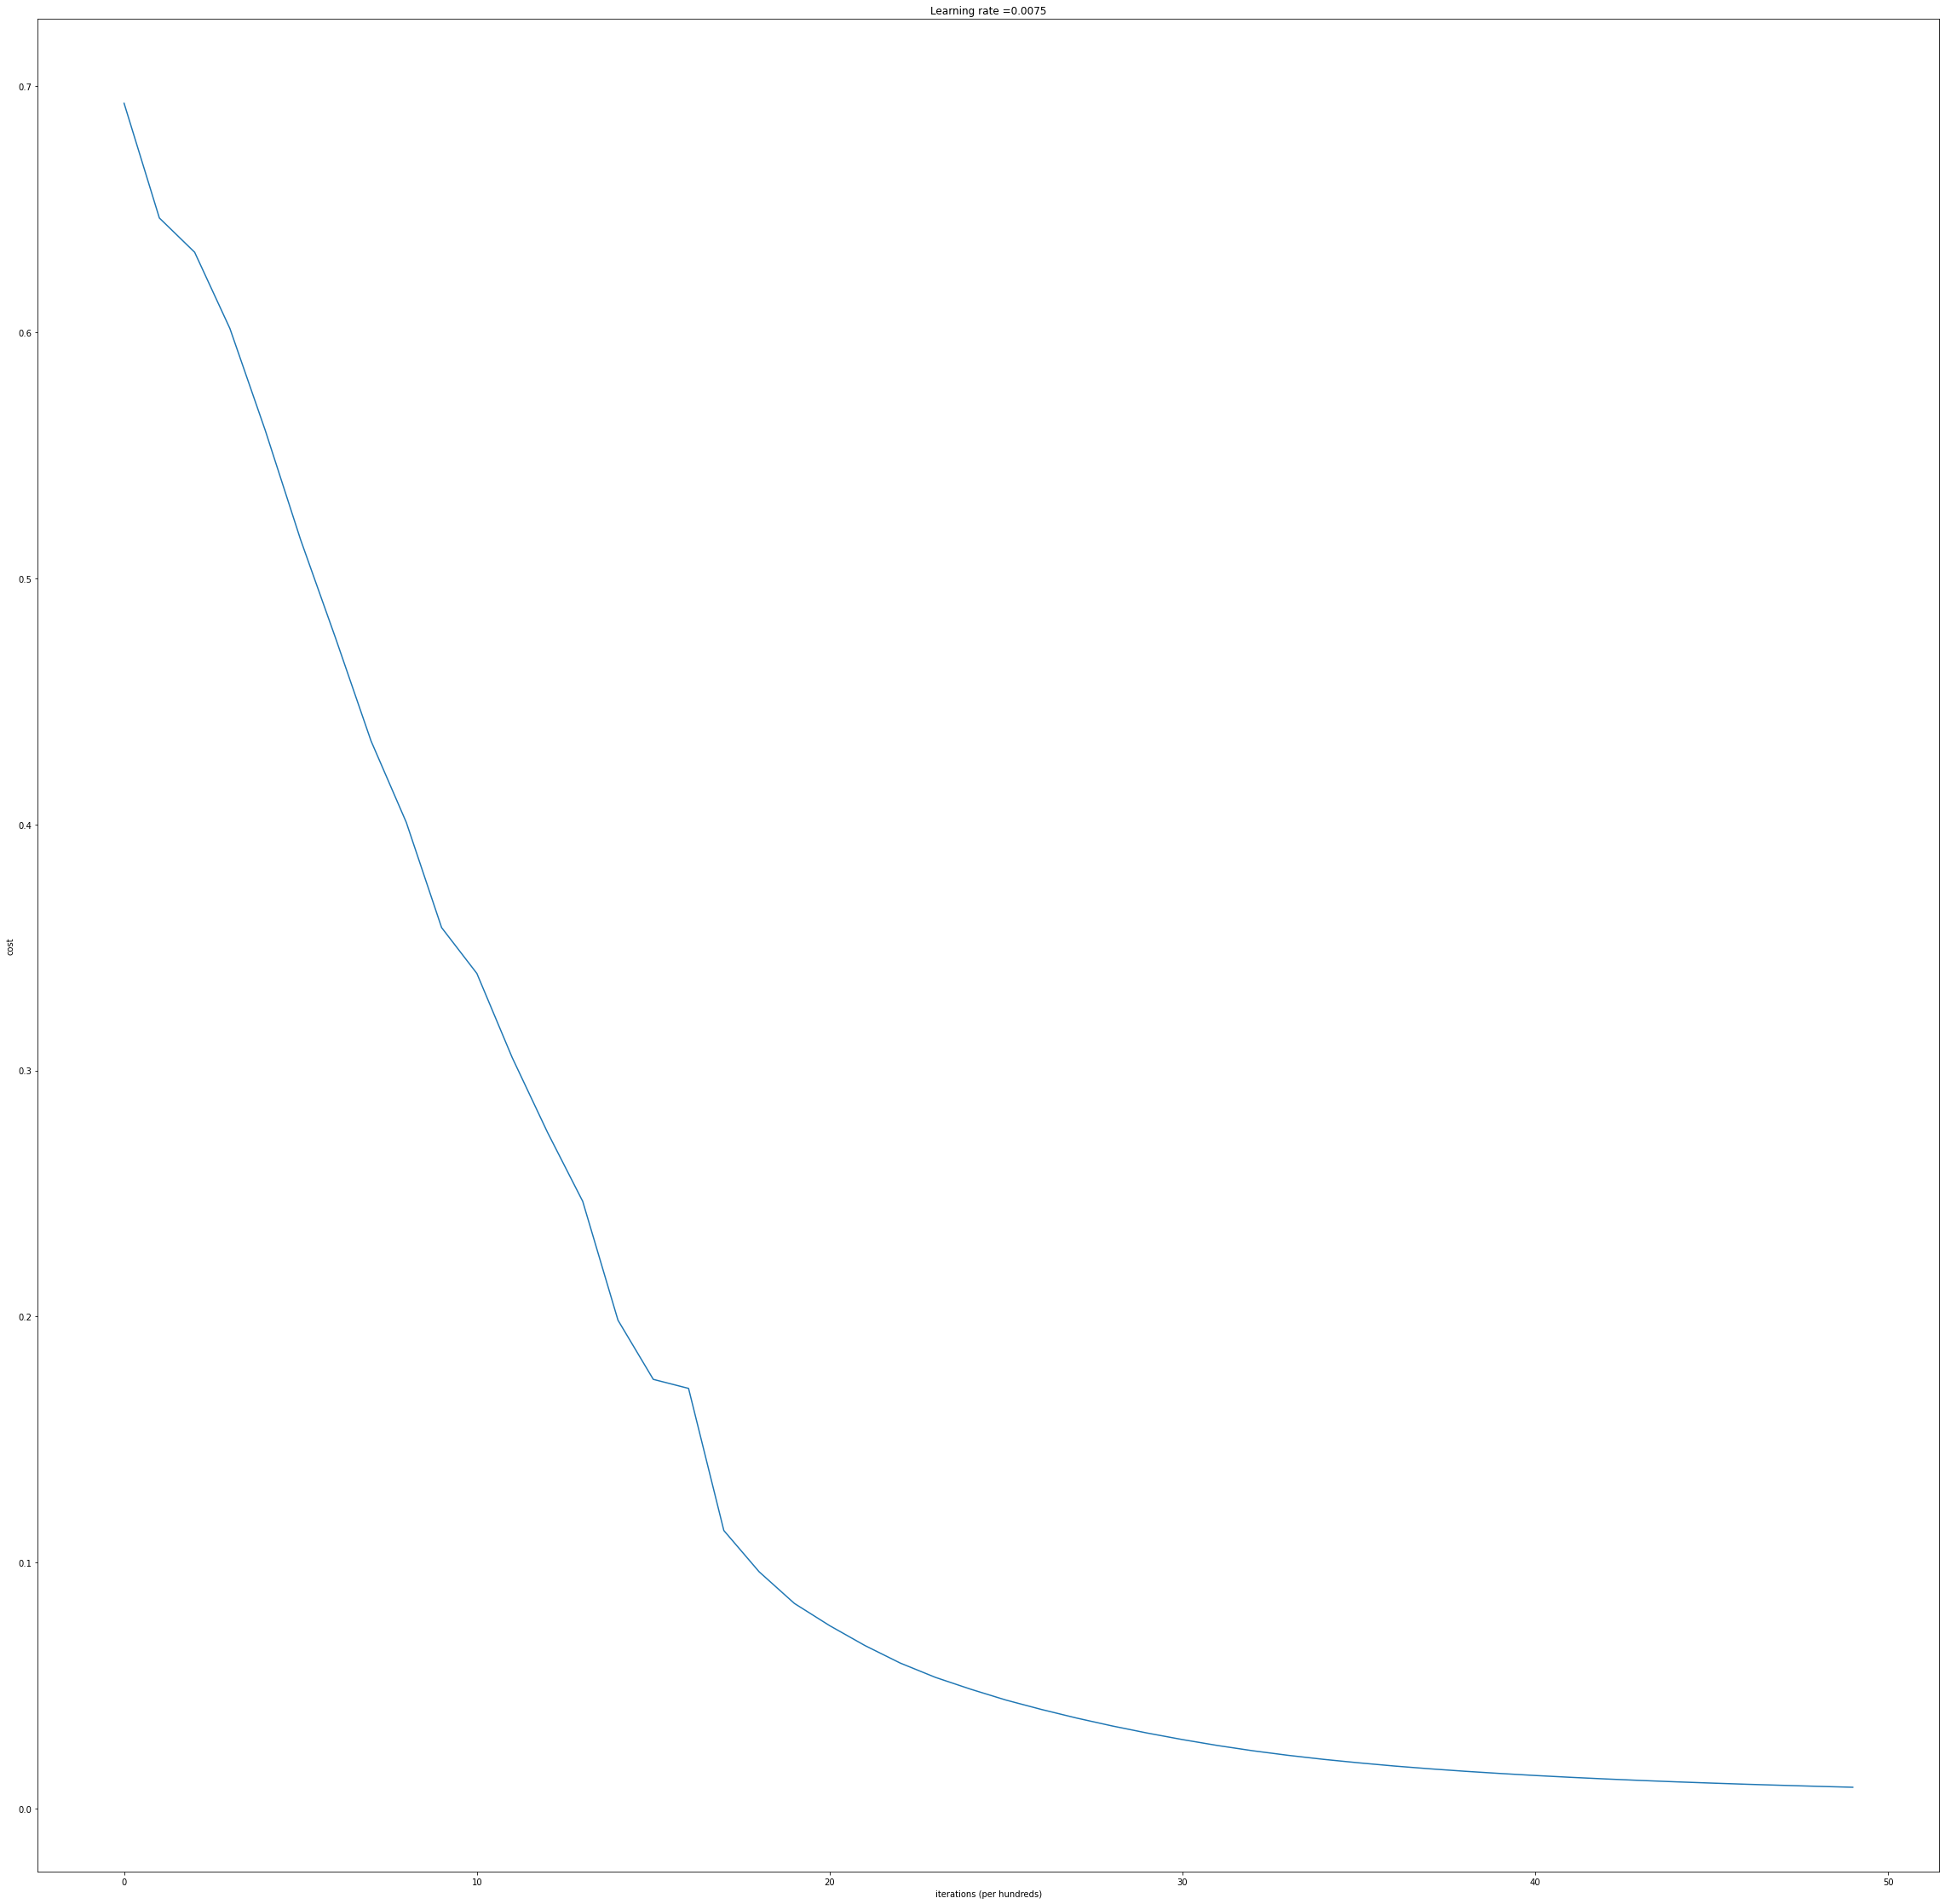

In [26]:
parameters = models.two_layer_model(train_x,train_y,layers_dims,learning_rate=learning_rate,num_iterations=iterations,print_cost=True)

In [27]:
predictions_train = predict.predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [28]:
pred_test = predict.predict(test_x, test_y, parameters)

Accuracy: 0.7000000000000001


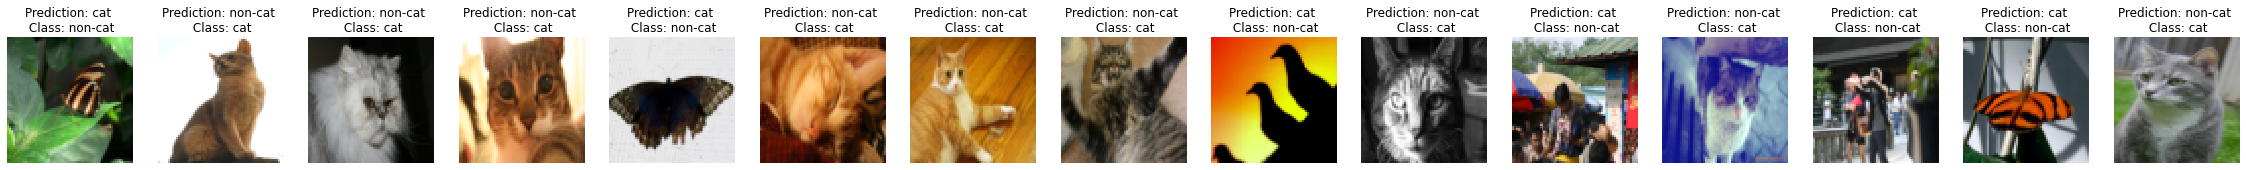

In [29]:
predict.print_mislabeled_images(classes, test_x, test_y, pred_test)